<a href="https://colab.research.google.com/github/Nasreen69/DL/blob/main/ML%26DL_Model_for_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction


In [2]:
!wget https://raw.githubusercontent.com/doctorai-in/EY_workshop/main/datasets/car_price.csv

--2023-04-14 06:37:24--  https://raw.githubusercontent.com/doctorai-in/EY_workshop/main/datasets/car_price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘car_price.csv’

car_price.csv       100%[===================>]  26.09K  --.-KB/s    in 0.002s  

2023-04-14 06:37:25 (15.5 MB/s) - ‘car_price.csv’ saved [26717/26717]



### *Load Libraries*

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### *Dataset Description*

In [3]:
df = pd.read_csv(r'/content/car_price.csv')

In [ ]:
df.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [ ]:
df.tail(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.shape

(205, 26)

In [ ]:
len(df.columns)

26

### *Method-1. change column name and add by droping existing one*

In [ ]:
df = pd.read_csv(r'/content/car_price.csv')
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])  #line will be added to the last
df.drop('CarName', axis=1)[:4] 

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi


### *Method-2. change column name and add by droping existing one*

In [118]:
df = pd.read_csv(r'/content/car_price.csv')
companyname = df['CarName'].apply(lambda x: x.split(' ')[0])
df = df.drop('CarName', axis=1)
df.insert(2, 'companyname', companyname)
df.head(3)

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [119]:
df['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [120]:
df.companyname = df.companyname.str.lower()

def replace_name(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## *Data Cleaning*

### *null values*

In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
companyname         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Duplicates 

In [10]:
df.columns

Index(['car_ID', 'symboling', 'companyname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.loc[df.duplicated()] 

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### *Visualization* 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### *Categorical Data* 

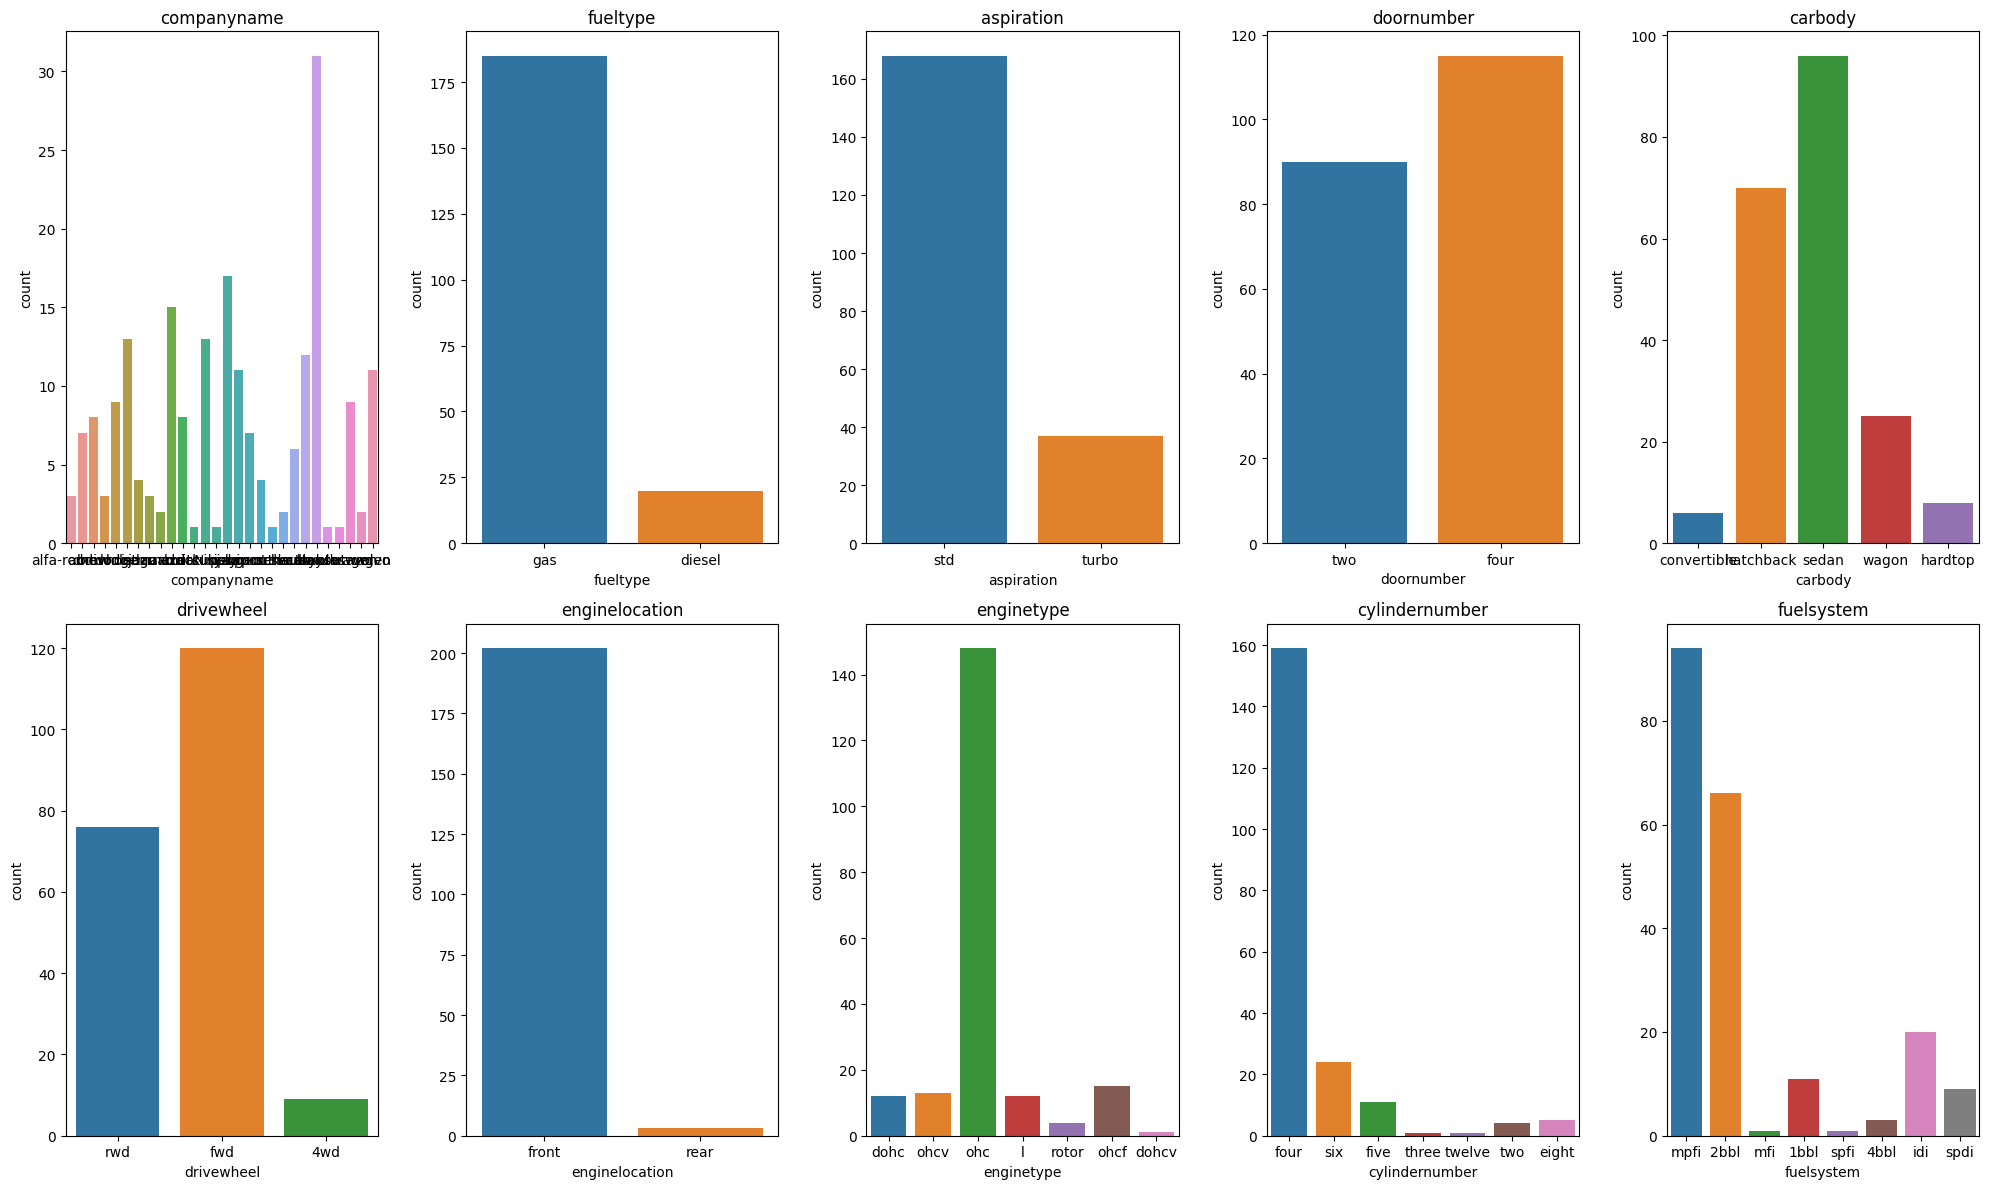

In [ ]:
import math

# Get the list of categorical columns
cat_cols = list(df.select_dtypes(include=['object']).columns)

# Define the desired size of the grid
subplot_size = 5

# Calculate the number of rows and columns needed based on the number of categorical columns and the desired size
num_cols = len(cat_cols)
num_rows = math.ceil(num_cols/subplot_size)

# Define the size of each subplot in the grid
fig, axes = plt.subplots(nrows=num_rows, ncols=subplot_size, figsize=(20, 12))

# Loop through each categorical column and create a seaborn plot in the corresponding subplot
for i, col in enumerate(cat_cols):
    row_idx = i // subplot_size  # calculate the row index
    col_idx = i % subplot_size  # calculate the column index
    sns.countplot(x=col, data=df, ax=axes[row_idx][col_idx])
    axes[row_idx][col_idx].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

***Inference:***

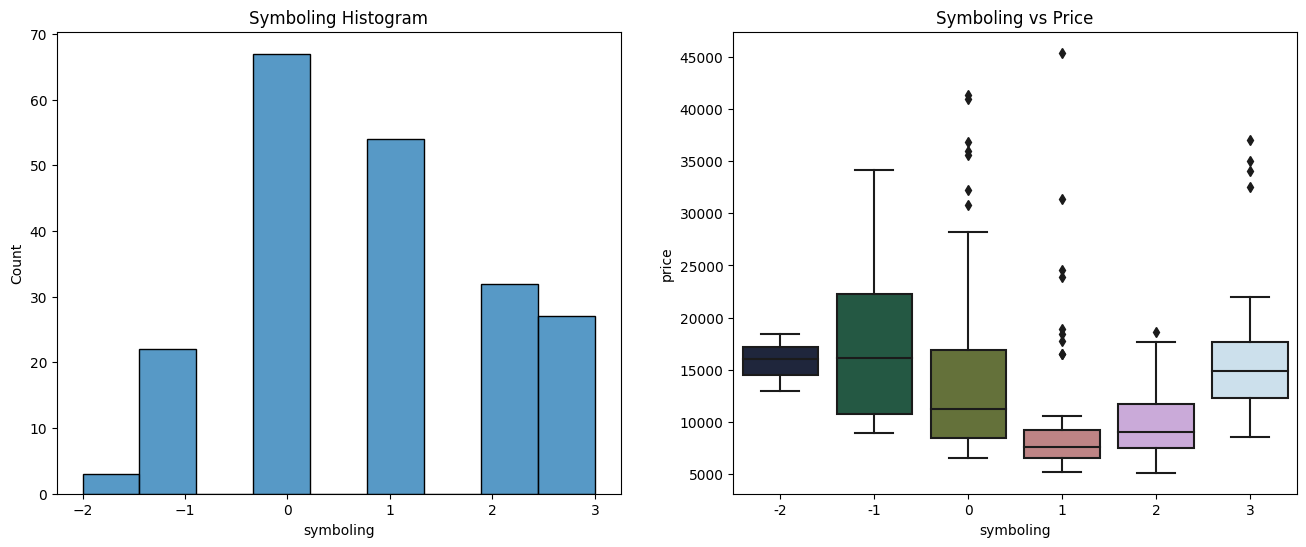

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.histplot(df.symboling, palette="ch:.25")

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

In [15]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

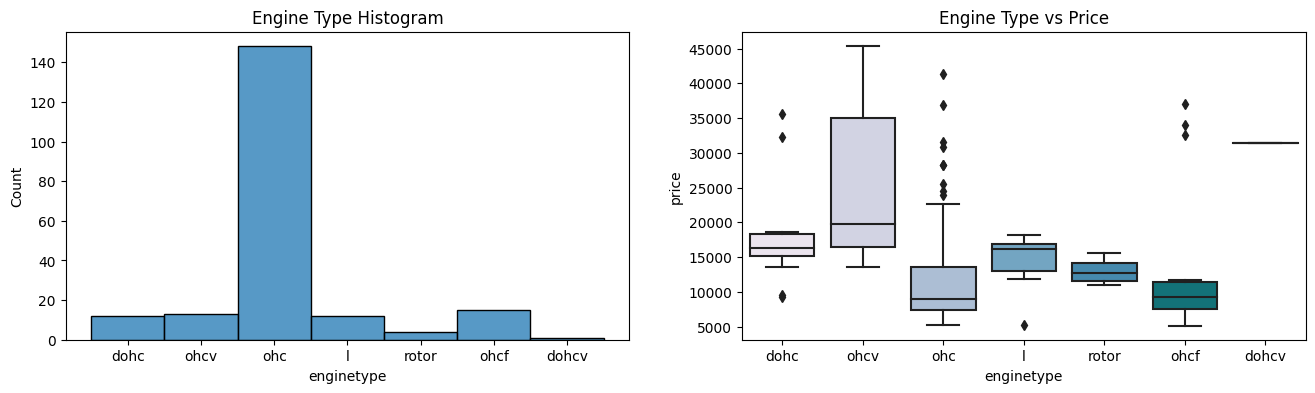

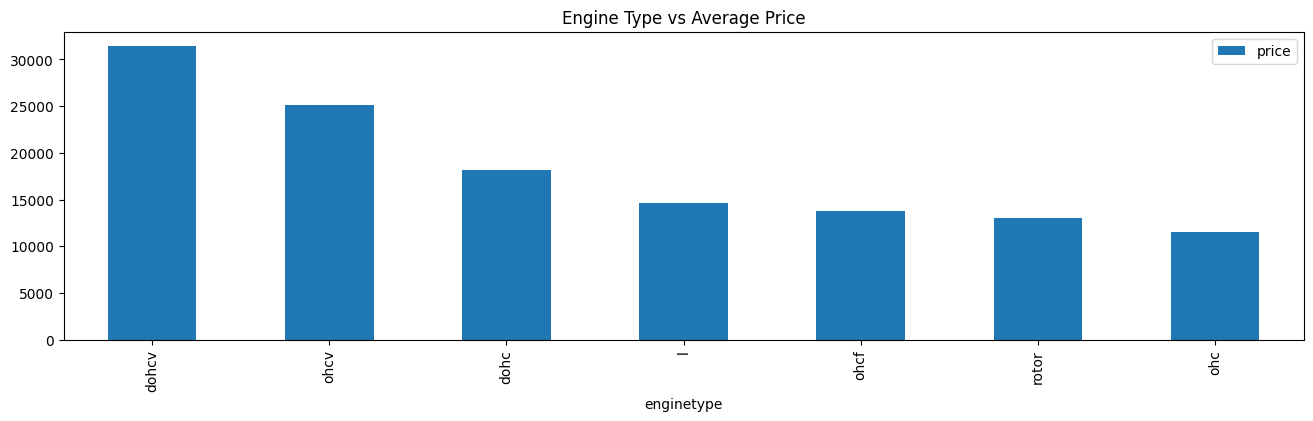

In [20]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.histplot(df.enginetype, palette="ch:.25")

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))
plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(16,4))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1600x400 with 0 Axes>

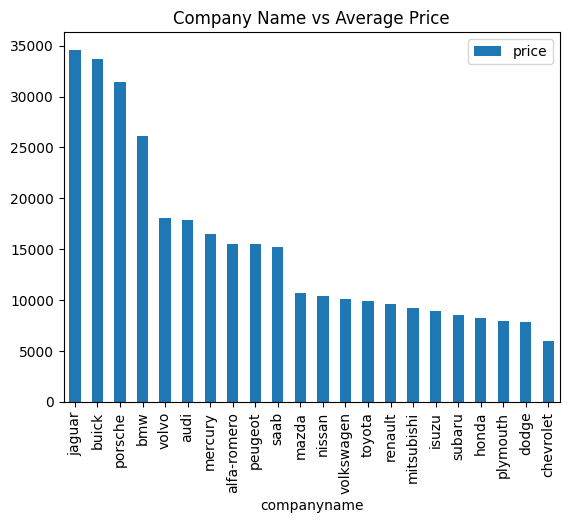

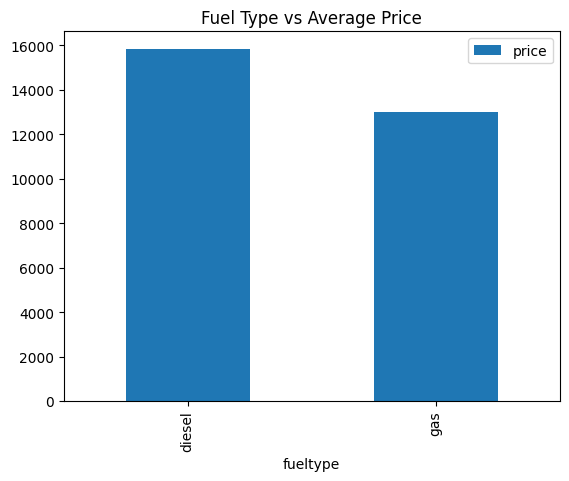

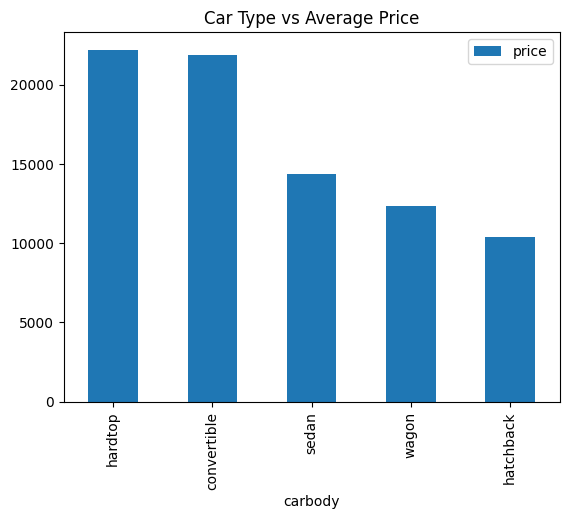

In [22]:
plt.figure(figsize=(16, 4))

df2 = pd.DataFrame(df.groupby(['companyname'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()


df3 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df4 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

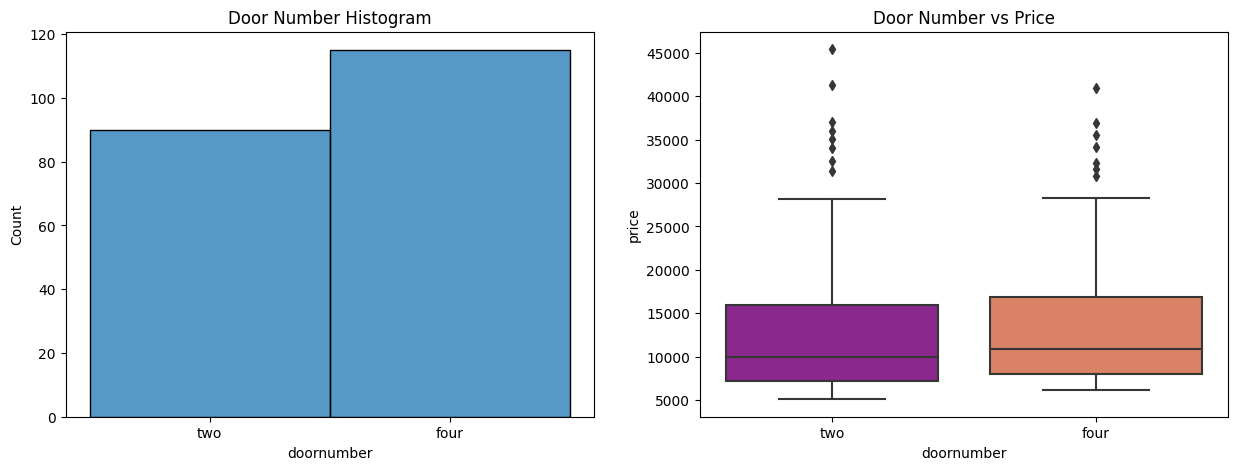

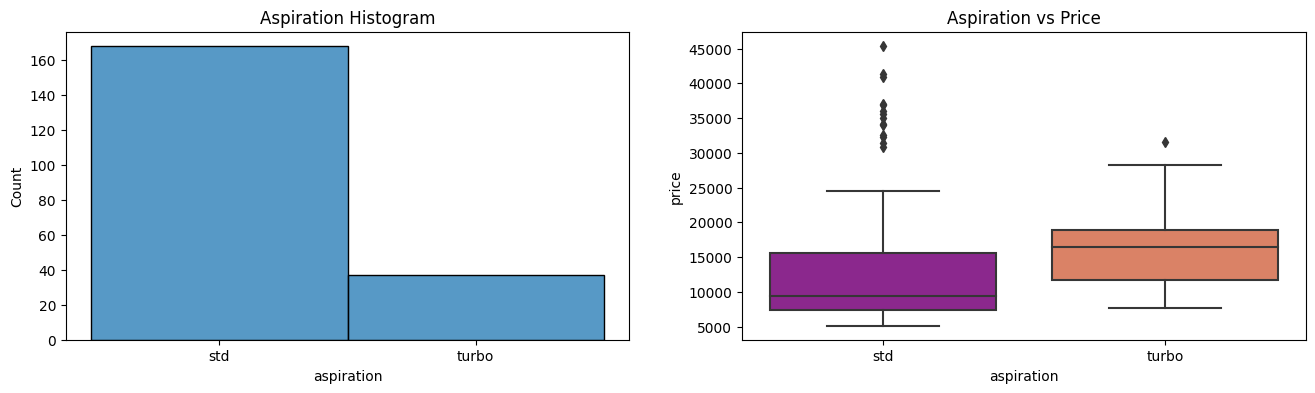

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.histplot(df.doornumber, palette="ch:.25")

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.histplot(df.aspiration, palette="ch:.25")

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

<Axes: >

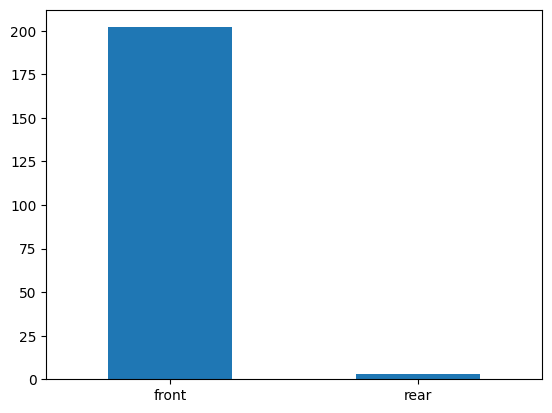

In [ ]:
df['enginelocation'].value_counts().plot.bar(rot=0)

<BarContainer object of 2 artists>

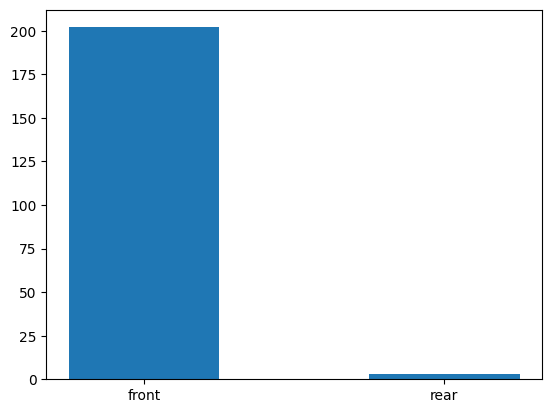

In [ ]:
categories = df['enginelocation'].value_counts().index
counts = df['enginelocation'].value_counts().values
plt.bar(categories, counts, width=0.5)

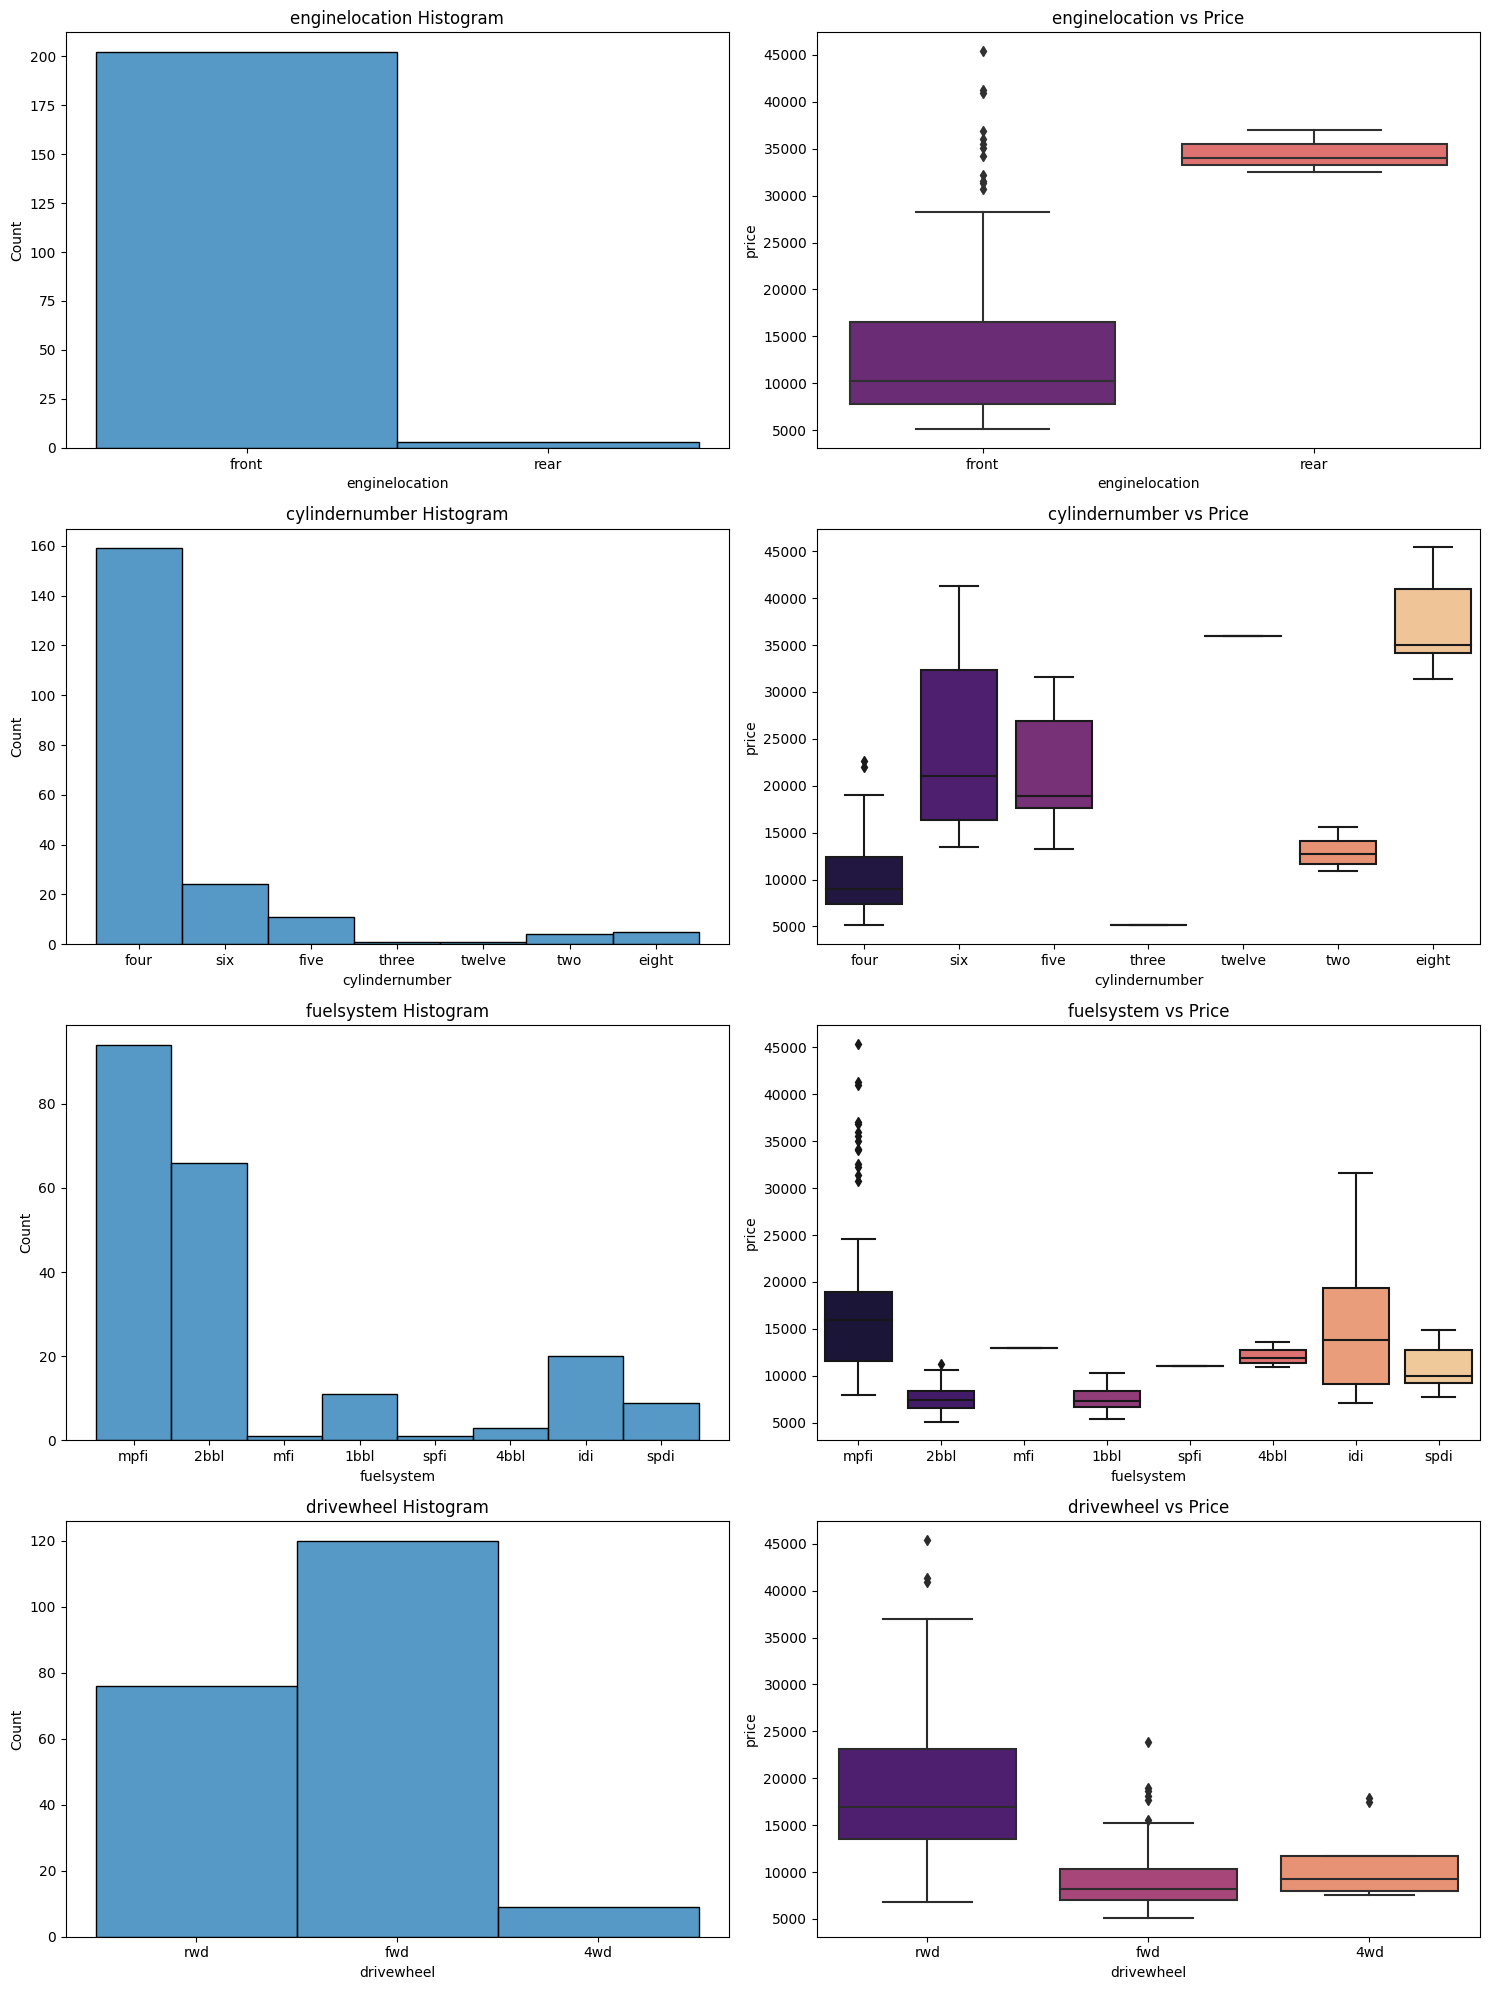

In [31]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.histplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### *Neumerical Data* 

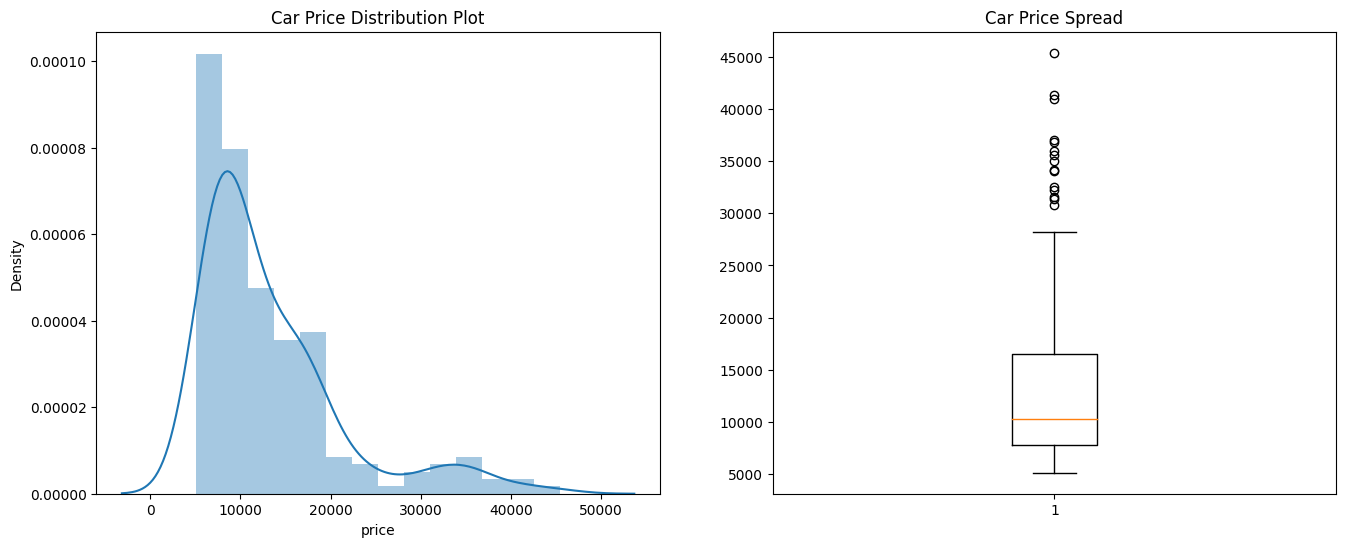

In [11]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot') 
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
plt.boxplot(df.price) 

plt.show()

***Inference:***



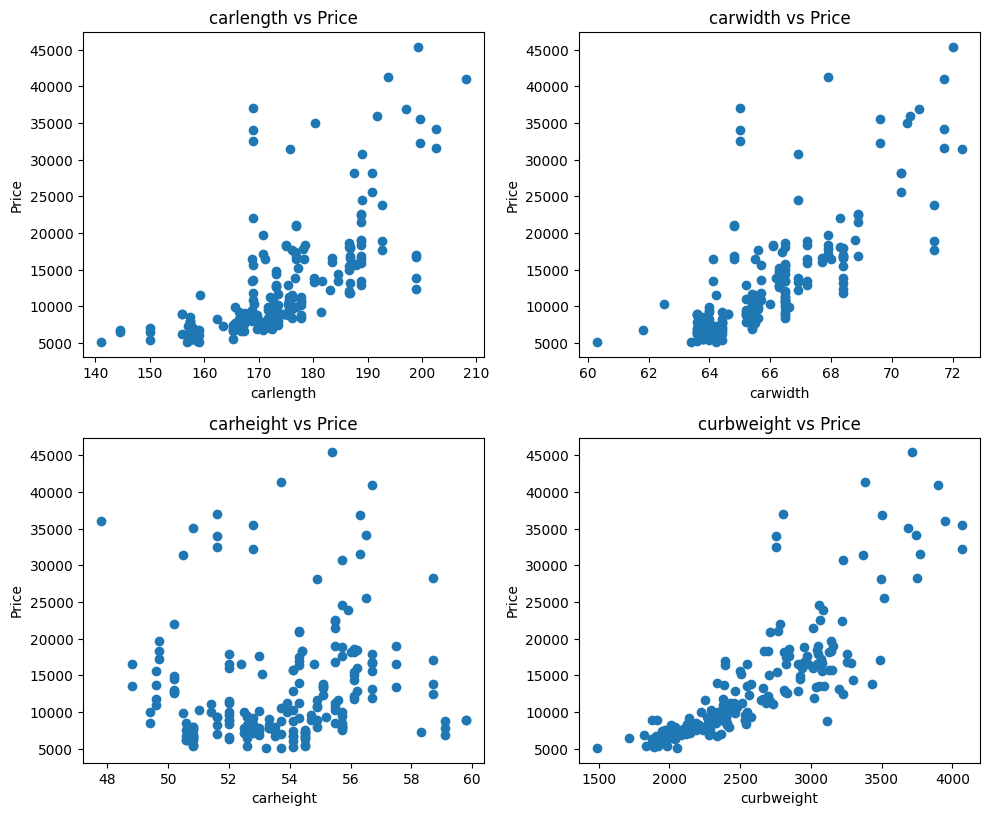

In [32]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

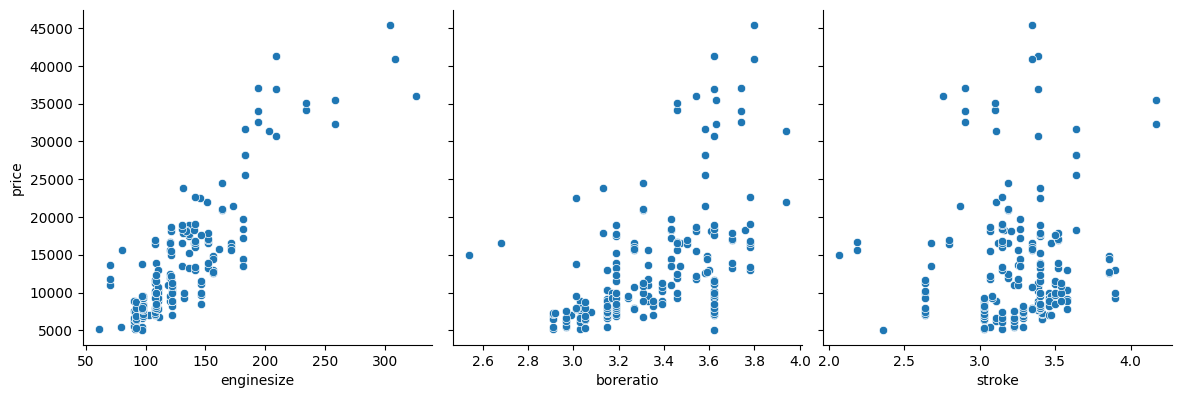

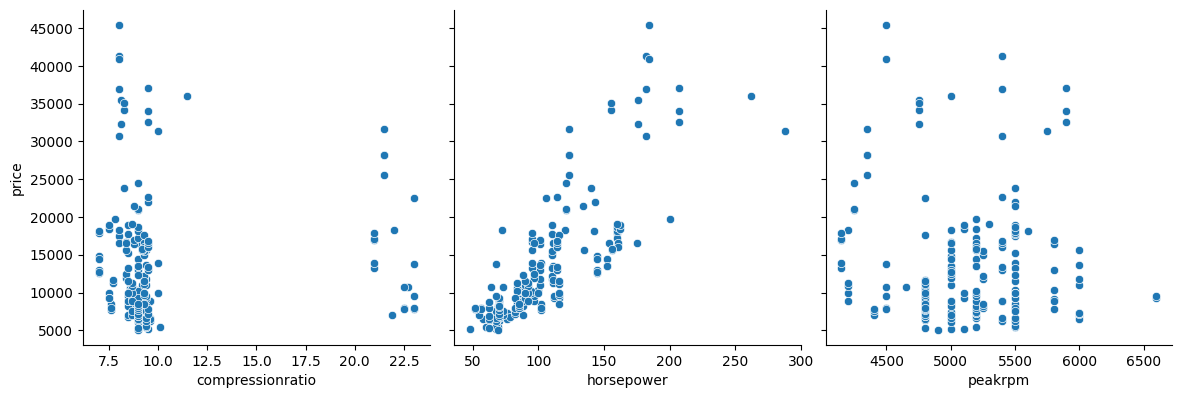

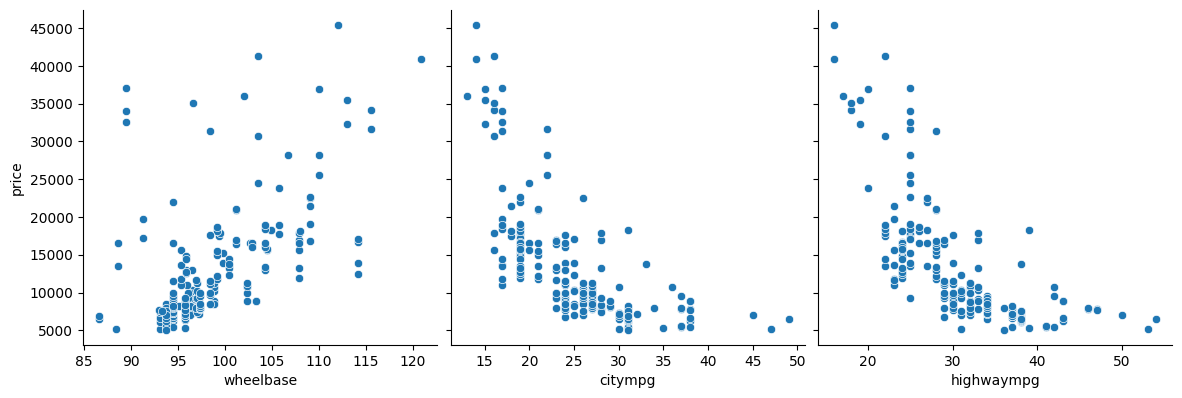

In [33]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [34]:
np.corrcoef(df['carlength'], df['carwidth'])[0, 1]

0.841118268481846

### ***Data Preparation*** 

####  *Deriving new features*

In [123]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [124]:
df.columns

Index(['car_ID', 'symboling', 'companyname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

####  *Bivariate Analysis*

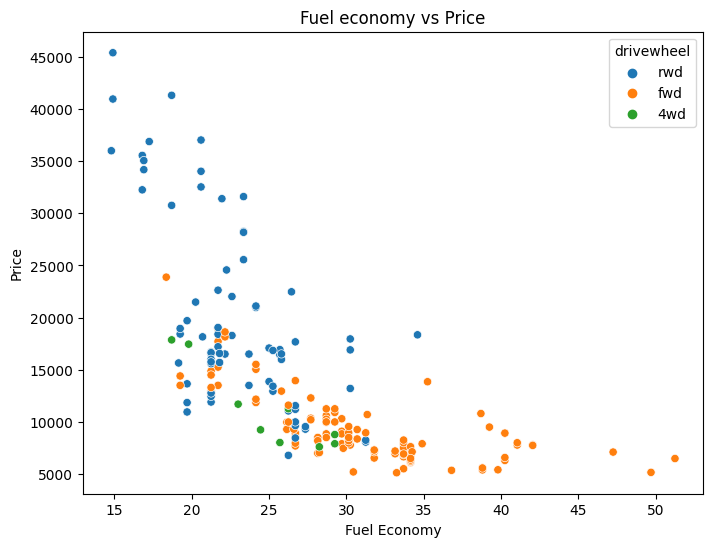

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### List of significant variables after Visual analysis :
 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [121]:
df.select_dtypes(include='object').columns.tolist()

['companyname',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [125]:
df_linear_reg = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
df_linear_reg.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


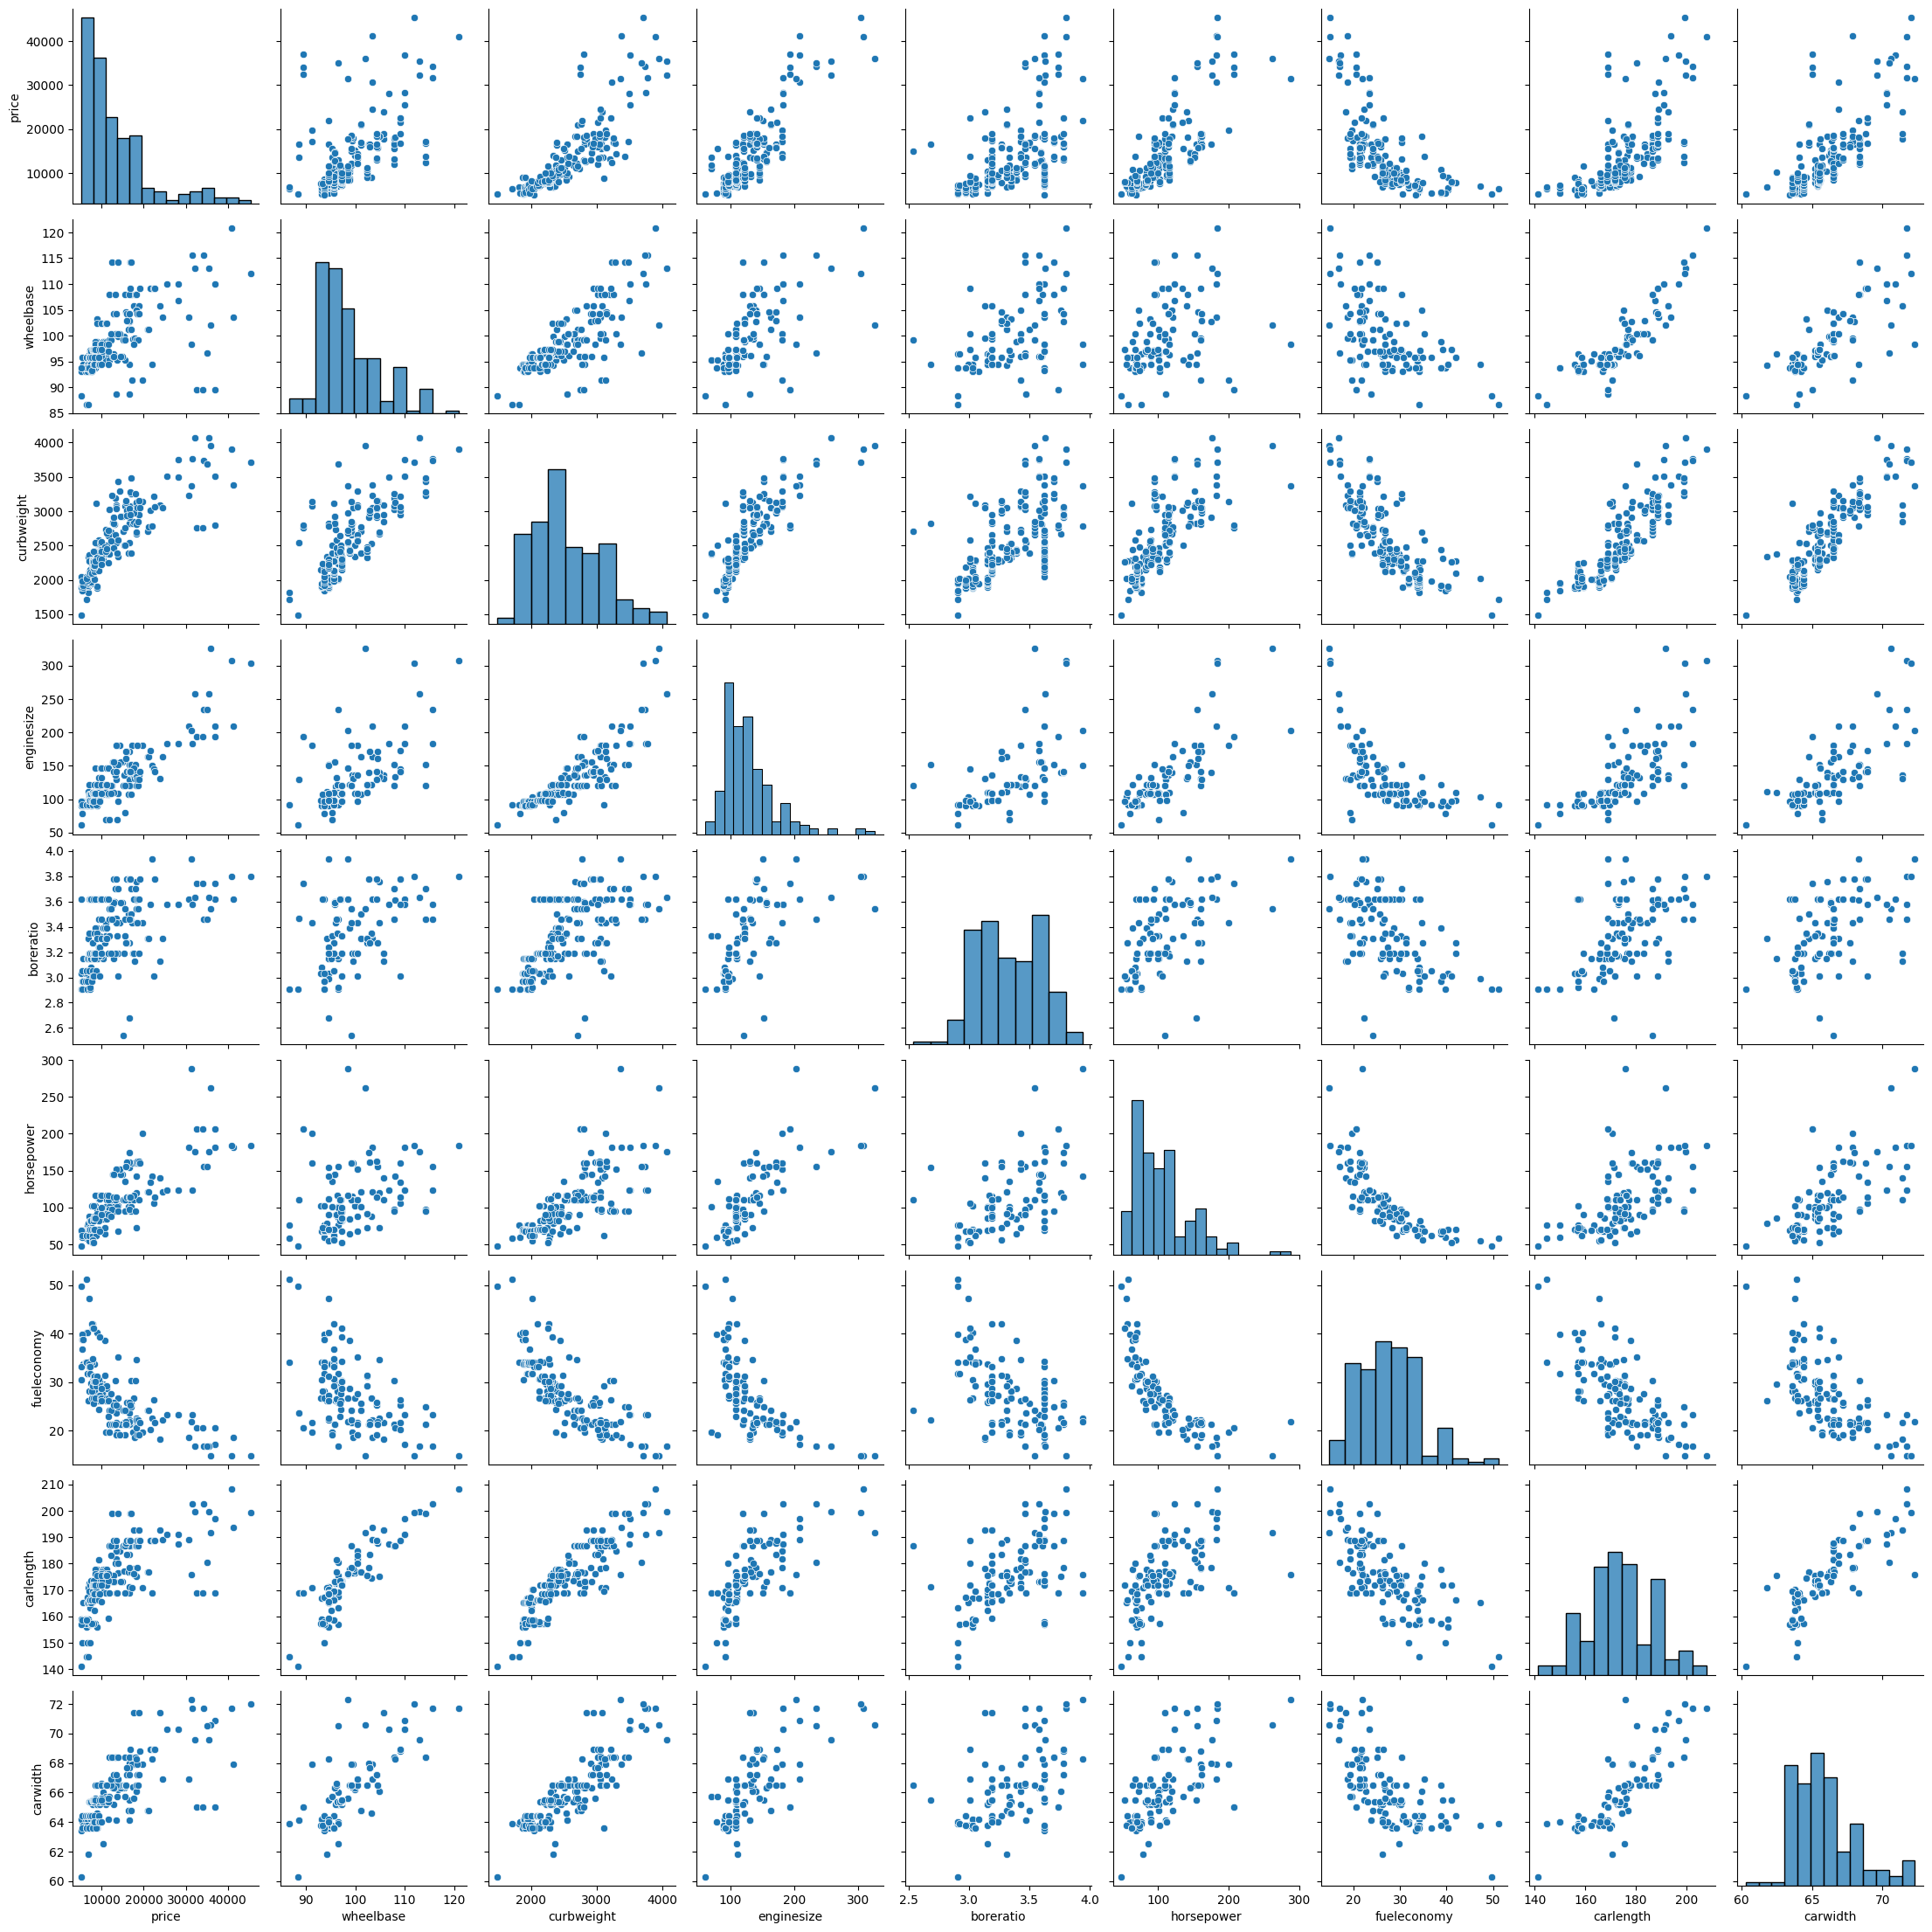

In [46]:
sns.pairplot(df_linear_reg)
plt.show()

#### *Dummy Variables*

In [126]:
# Define the map function
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

# Apply the function to the df_linear_reg DataFrame for all categorical variables
df_linear_reg = dummies('fueltype', df_linear_reg)
df_linear_reg = dummies('aspiration', df_linear_reg)
df_linear_reg = dummies('carbody', df_linear_reg)
df_linear_reg = dummies('drivewheel', df_linear_reg)
df_linear_reg = dummies('enginetype', df_linear_reg)
df_linear_reg = dummies('cylindernumber', df_linear_reg)


In [127]:
df_linear_reg.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,1,0,0,0,1,0,0,0,0,0


In [128]:
df_linear_reg.shape

(205, 29)

### *Train-Test Split and feature scaling*

In [185]:
from sklearn.model_selection import train_test_split

np.random.seed(0) #which means that the random numbers generated by the NumPy random number generator will be the same every time the code is run, as long as the same version of NumPy is being used.
df_train, df_test = train_test_split(df_linear_reg, train_size = 0.7, test_size = 0.3, random_state = 100)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42)

*If your data is normally distributed or approximately so, and does not have outliers, then StandardScaler is likely to be a good choice. If your data is not normally distributed or has outliers, then MinMaxScaler may be a better choice*

*It is worth noting that some machine learning algorithms, such as decision trees and random forests, are not sensitive to feature scaling, so it may not be necessary to use either StandardScaler or MinMaxScaler for these algorithms.*

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [140]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_train.shape

In [160]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,7738.0,95.7,2094,98,3.19,70,42.05,166.3,64.4,1,...,1,0,0,0,0,1,0,0,0,0
186,8495.0,97.3,2275,109,3.19,85,30.15,171.7,65.5,1,...,1,0,0,0,0,1,0,0,0,0
59,8845.0,98.8,2385,122,3.39,84,28.70,177.8,66.5,1,...,1,0,0,0,0,1,0,0,0,0
165,9298.0,94.5,2265,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,0,0,1,0,0,0,0
140,7603.0,93.3,2240,108,3.62,73,28.25,157.3,63.8,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_test.shape

In [141]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


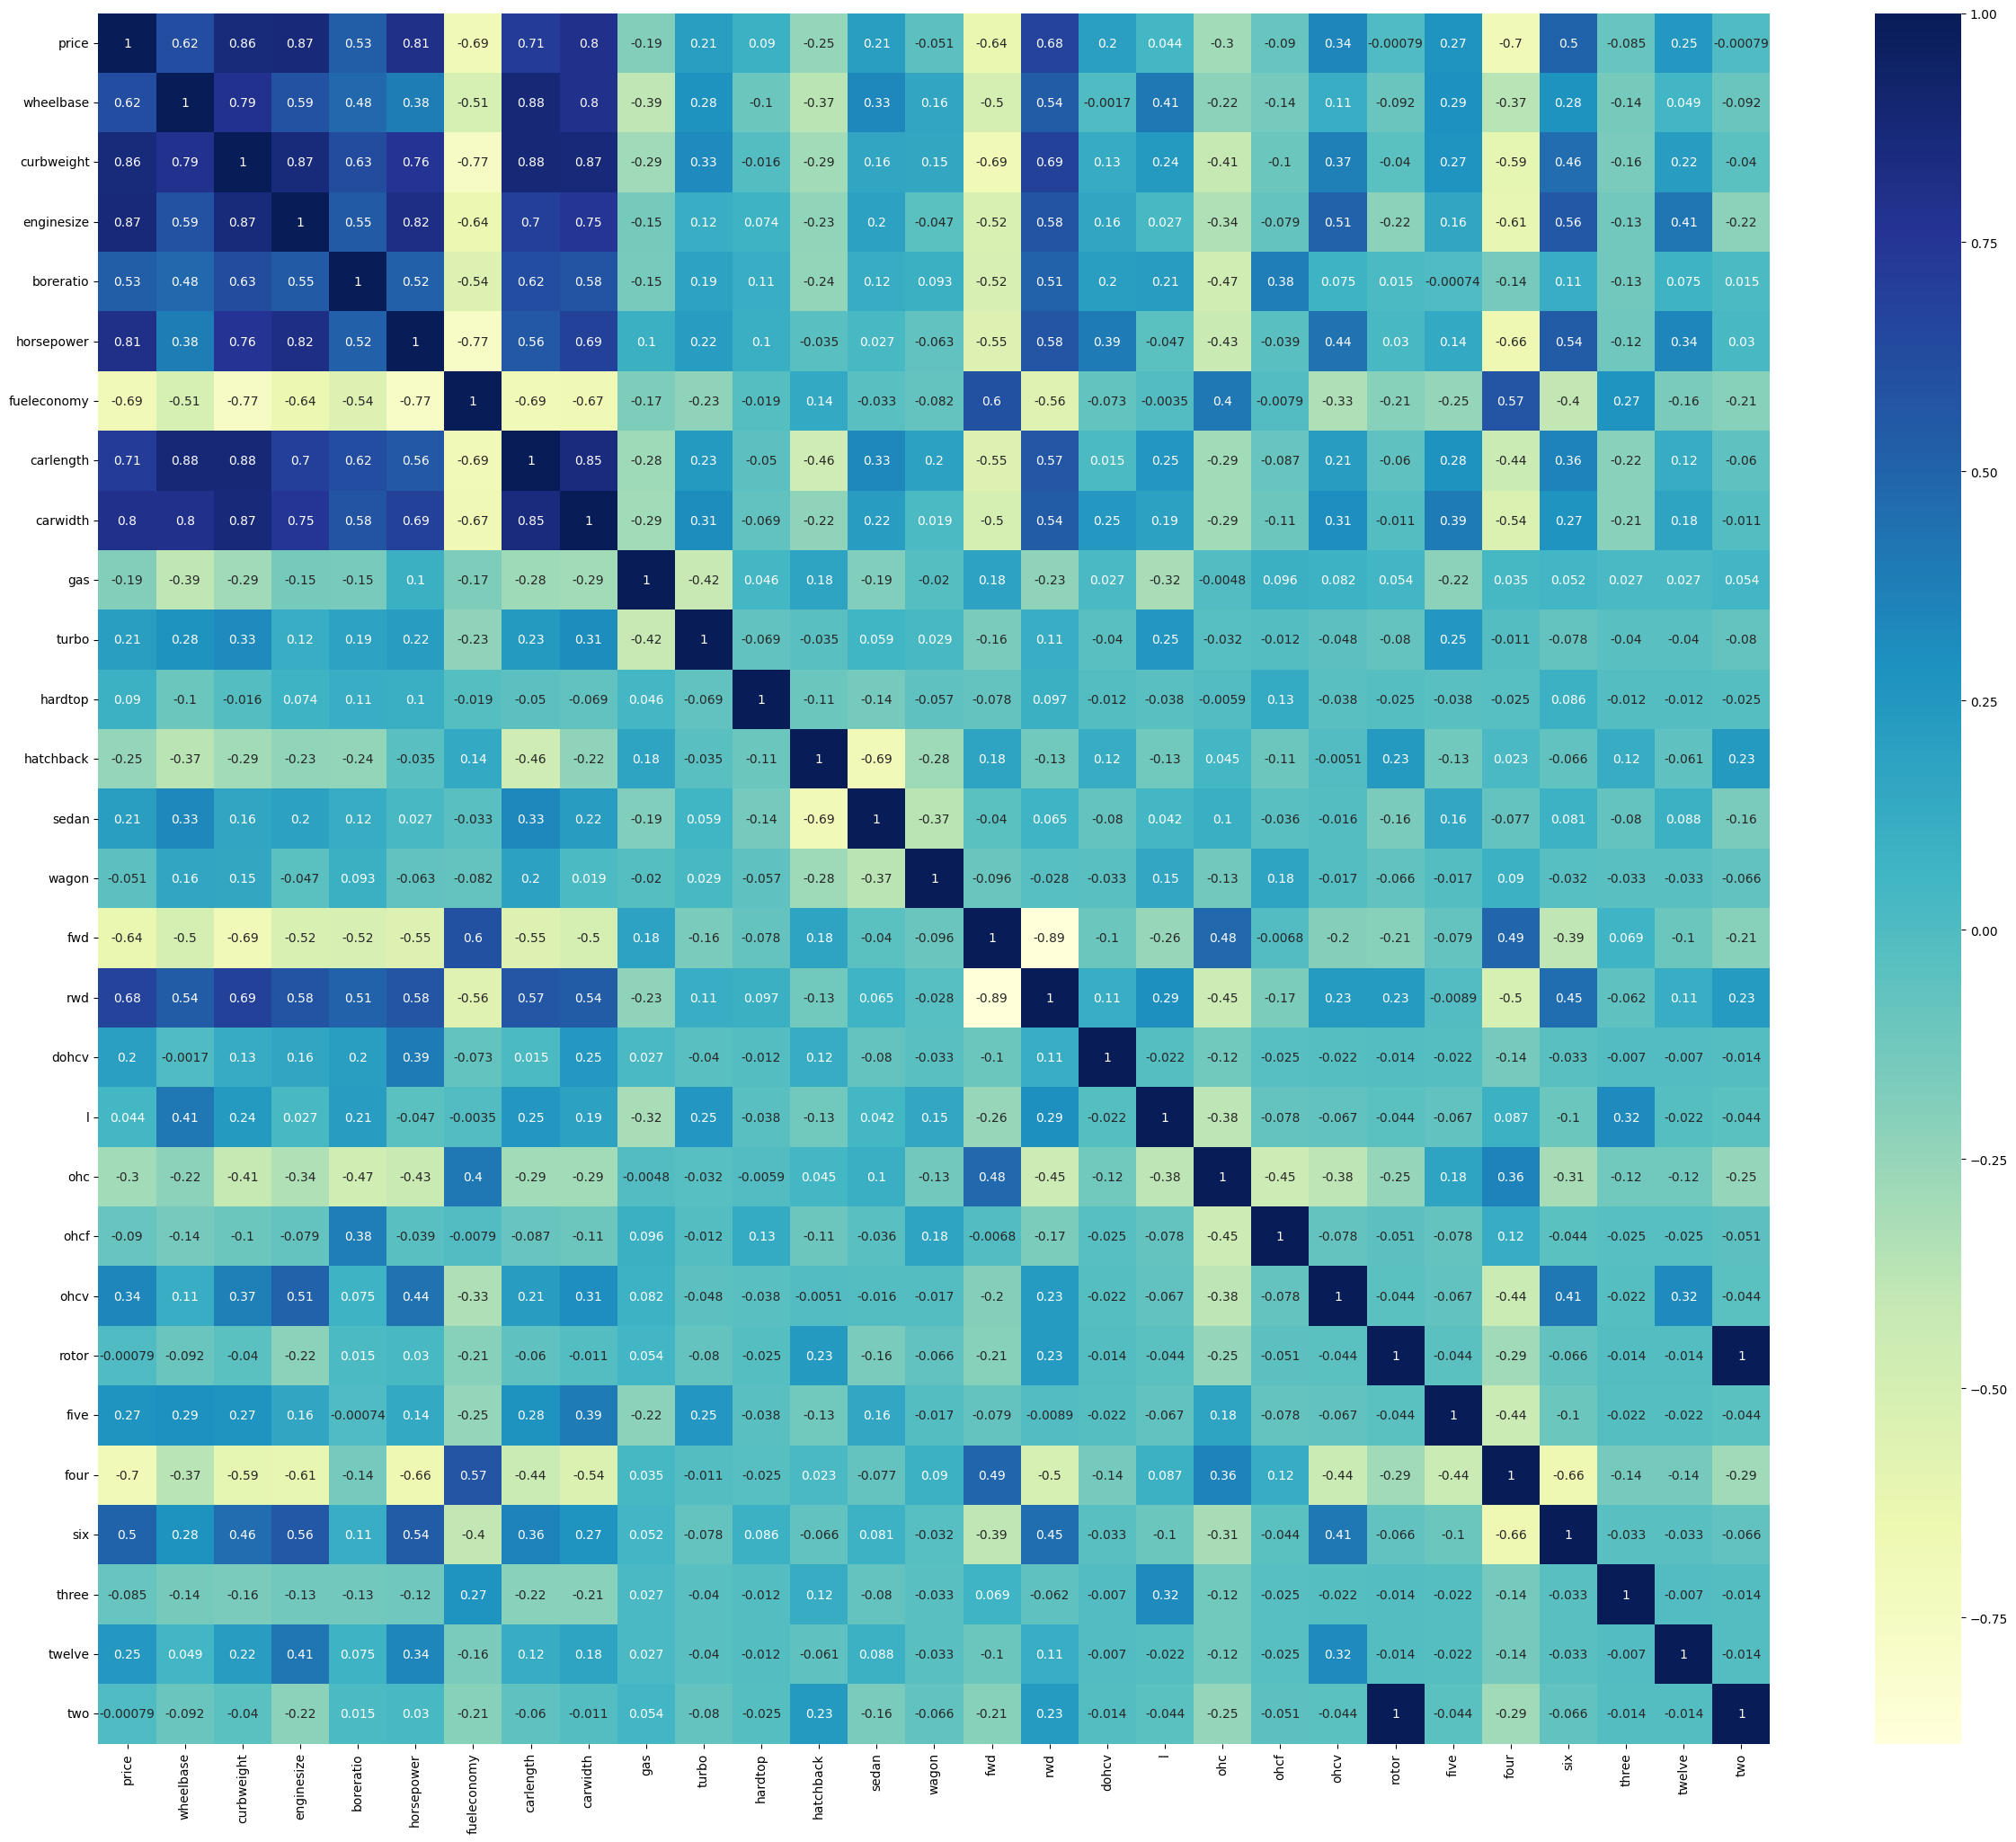

In [89]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

*Highly correlated variables to price are -* `curbweight`, `enginesize`, `horsepower`,`carwidth` *and* `highend`.

In [142]:
train_data =  df_train.copy()
test_data =  df_test.copy()

In [147]:
#Dividing train data into X and y variables
X_train = train_data.drop(['price'],axis = 1)
y_train = train_data['price']

In [148]:
#Dividing test data into X and y variables
X_test = test_data.drop(['price'],axis = 1)
y_test = test_data['price']

### *ML Model Building*

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

*RFE stands for Recursive Feature Elimination. It is a feature selection algorithm used in machine learning to select a subset of features that are most relevant for predicting the target variable*

In [154]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [155]:
def model_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [156]:
test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 12998.654645500495
MSE: 236943289.1745419
RMSE: 15392.962326158728
R2 Square -2.383497734285067
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04429888166963241
MSE: 0.0037522474498049396
RMSE: 0.06125559117178561
R2 Square 0.9187708595813846
__________________________________


In [ ]:
# instead of linear regression random forest regressor 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
test_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13784.19045370005
MSE: 260033091.0245598
RMSE: 16125.541573062277
R2 Square -2.7132149949713456
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.016598190822263544
MSE: 0.0005958916277777555
RMSE: 0.024410891580967615
R2 Square 0.9871000606024656
__________________________________


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
test_pred = svr.predict(X_test)
train_pred = svr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13784.562718833966
MSE: 260043265.80003953
RMSE: 16125.85705629439
R2 Square -2.713360288513537
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06280579848996867
MSE: 0.005234923173380172
RMSE: 0.0723527689406575
R2 Square 0.8866737028355454
__________________________________


In [162]:
import xgboost as xgb
# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)


# Train the model on the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the testing data
test_pred = xg_reg.predict(X_test)
train_pred = xg_reg.predict(X_train)

#calculate metrics
print('Train set evaluation:\n_____________________________________')
model_evaluate(y_train, train_pred)
print('Test set evaluation:\n_____________________________________')
model_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 0.11097334900825051
MSE: 0.01863667892767224
RMSE: 0.13651622221432969
R2 Square 0.5965507526346014
__________________________________
Test set evaluation:
_____________________________________
MAE: 13784.514373416861
MSE: 260041609.03197914
RMSE: 16125.805686289883
R2 Square -2.713336630232274
__________________________________


### *DL Model Building*

*Multi-layer Perceptron (MLP): This is a type of feedforward neural network that is good at learning complex nonlinear relationships. we can use an MLP to predict car prices based on features such as the make, model, year, mileage, and condition*

In [166]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(8,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train,np.log(y_train),verbose=0,validation_data=(X_test,np.log(y_test)),epochs=20,batch_size=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [191]:
# Make predictions on the testing data
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

#calculate metrics
print('Train set evaluation:\n_____________________________________')
model_evaluate(y_train, train_pred)
print('Test set evaluation:\n_____________________________________')
model_evaluate(y_test, test_pred)

5/5 [==============================] - 0s 3ms/step
Train set evaluation:
_____________________________________
MAE: 0.7936344736216757
MSE: 1.7212042205304625
RMSE: 1.3119467293036187
R2 Square -36.26085264601899
__________________________________
Test set evaluation:
_____________________________________
MAE: 8746.36314342868
MSE: 135319505.9833768
RMSE: 11632.691261413964
R2 Square -0.9323325994772402
__________________________________
